## Part 1. General Structure

In [34]:


import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

dir ="cleaned_data_combined.csv"
print(dir)
df = pd.read_csv(dir)

df.head()


cleaned_data_combined.csv


,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6,"Week day lunch,At a party,Late night snack",5,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza
1,715742,4,"bread, meet","Week day lunch,At a party,Late night snack",5$ for a large piece,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10dollar,action movie,cola,Friends,A moderate amount (medium),Pizza
3,606874,4,7-Jun,"Week day lunch,Week day dinner,Weekend lunch,W...",$3,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3 or more,"Week day lunch,Week day dinner,Weekend lunch,W...",$5,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza


In [35]:
# Shape and general info
print(df.shape)
df.info()

# Statistical summary for numerical features
df.describe()


(1644, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 10 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   id                                                                                                                     1644 non-null   int64 
 1   Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)  1644 non-null   int64 
 2   Q2: How many ingredients would you expect this food item to contain?                                                   1644 non-null   object
 3   Q3: In what setting would you expect this food to be served? Please check all that apply                               1644 non-null   object


,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"
count,1644.000000,1644.000000
mean,581970.958029,3.174574
std,125479.145414,1.021050
min,5978.000000,1.000000
25%,524483.750000,2.000000
50%,617502.000000,3.000000
75%,631686.250000,4.000000
max,854745.000000,5.000000


In [36]:
label_counts = df['Label'].value_counts()
print(label_counts)


Label
Pizza       548
Shawarma    548
Sushi       548
Name: count, dtype: int64


## Part 2.Numerical Features

Complexity rating

In [37]:
import matplotlib.pyplot as plt
def plot_numerical_feature_vs_label(df, feature_key, feature_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    feature = feature_key
    labels = df['Label'].unique()
    feature_by_label = [df[df['Label'] == label][feature].dropna() for label in labels]

    # Plotting boxplots
    ax.boxplot(feature_by_label, labels=labels)

    # Formatting plot
    ax.set_title("{} for Each Food".format(feature_name))
    ax.set_xlabel('Food Item Label')
    ax.set_ylabel(feature_name)
    plt.grid(axis='y')
    plt.savefig('graphs/{}.png'.format(feature_name))


C:\Users\13761\AppData\Local\Temp\ipykernel_34384\1127923424.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(feature_by_label, labels=labels)


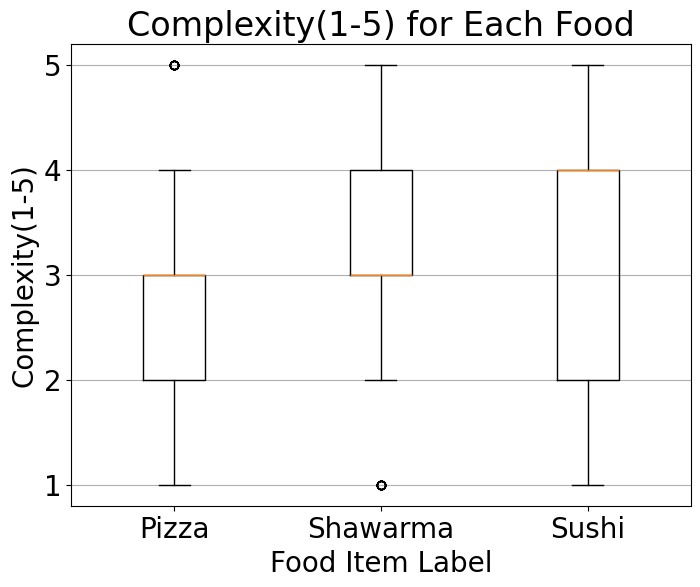

In [38]:
plot_numerical_feature_vs_label(df, "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)", "Complexity(1-5)")
# Display plot
plt.show()


Number of Ingredients

First extraction

In [39]:


# Function to preprocess ingredient count responses based on numerical occurrences and string parsing
def parse_number_extraction(response):
    if pd.isna(response):
        return None

    response = str(response).strip().lower()

    # Extract numbers from the response
    numbers = [float(num) for num in re.findall(r'\d+\.\d+|\d+', response)]

    if numbers:
        if len(numbers) == 1:
            return numbers[0]
        elif len(numbers) > 1:
            return sum(numbers) / len(numbers)
    else:
        # No numeric values, check for comma or hyphen-separated strings
        separators = re.findall(r'[,-]', response)
        words = re.findall(r'\w+', response)
        if len(separators) >= len(words) - 1 and len(words) > 1:
            return len(words)

    return float('nan')

# Apply this function to Q2 responses
df["ingredients_numeric"] = df["Q2: How many ingredients would you expect this food item to contain?"].apply(parse_number_extraction)

# Check how many values are successfully parsed
print(df['ingredients_numeric'].isna().sum(), "missing/invalid responses")
print(df[['Q2: How many ingredients would you expect this food item to contain?', "ingredients_numeric"]].head(15))


68 missing/invalid responses
   Q2: How many ingredients would you expect this food item to contain?  \
0                                                   6                     
1                                         bread, meet                     
2                                                   5                     
3                                               7-Jun                     
4                                           3 or more                     
5                                                   6                     
6                                        about 3 or 4                     
7                                               5-Apr                     
8                                                   5                     
9                                                   9                     
10                                                 10                     
11                                                  6                  

C:\Users\13761\AppData\Local\Temp\ipykernel_34384\1127923424.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(feature_by_label, labels=labels)


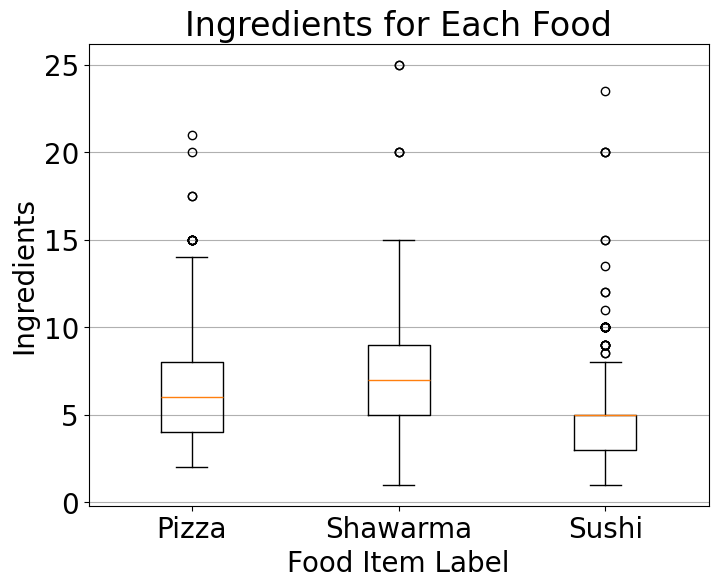

In [40]:
plot_numerical_feature_vs_label(df, "ingredients_numeric", "Ingredients")
# Display plot
plt.show()

Prices

In [41]:
df["price_numeric"] = df["Q4: How much would you expect to pay for one serving of this food item?"].apply(parse_number_extraction)
print(df['price_numeric'].isna().sum(), "missing/invalid responses")
print(df[['Q4: How much would you expect to pay for one serving of this food item?', "price_numeric"]].head(15))

10 missing/invalid responses
   Q4: How much would you expect to pay for one serving of this food item?  \
0                                                   5                        
1                                5$ for a large piece                        
2                                            10dollar                        
3                                                 $3                         
4                                                 $5                         
5                                                $15                         
6                                                   1                        
7                                           20 dollar                        
8                                           3 dollars                        
9                                                   4                        
10                                                 20                        
11                                1

C:\Users\13761\AppData\Local\Temp\ipykernel_34384\1127923424.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(feature_by_label, labels=labels)


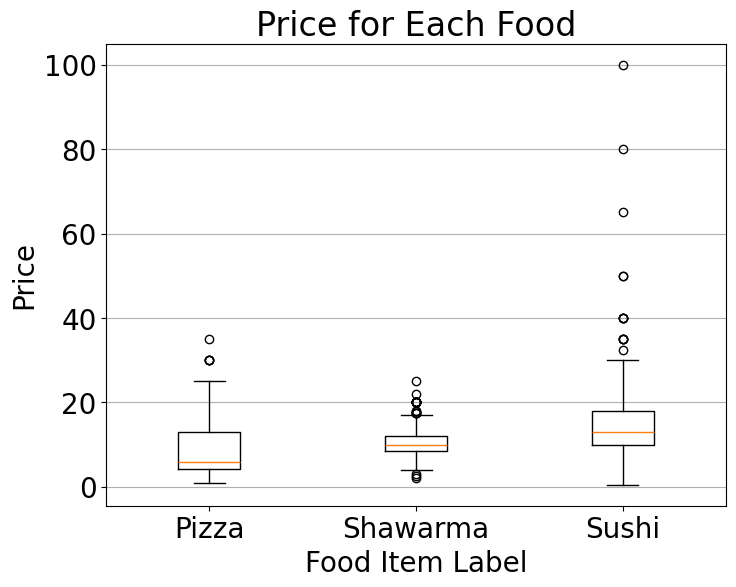

In [42]:
plot_numerical_feature_vs_label(df, "price_numeric", "Price")

# Display plot
plt.show()

In [43]:
print(df[df['price_numeric'] <= 3])

          id  \
3     606874   
6     606929   
8     644623   
18    516975   
21    521125   
...      ...   
1608  631711   
1609  606010   
1615  741592   
1637  632117   
1642  630128   

      Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)  \
3                                                     4                                                                       
6                                                     3                                                                       
8                                                     3                                                                       
18                                                    2                                                                       
21                                                    4                                                                       
...                                          

## Part 3.Categorical Features

Ordinal feature: Hot Sauce

In [44]:
print(df['Q8: How much hot sauce would you add to this food item?'].unique())

['A little (mild)' nan 'A moderate amount (medium)'
 'I will have some of this food item with my hot sauce' 'A lot (hot)']


In [45]:
# A clear order was shown between responses other than 'I will have some of this food item with my
# hot sauce', this response was sent to -1
hot_sauce_order = {
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'I will have some of this food item with my hot sauce': -1,
    'A lot (hot)': 3
}



df['hot_sauce_numeric'] = df['Q8: How much hot sauce would you add to this food item?'].map(hot_sauce_order)
df['hot_sauce_numeric'] = df['hot_sauce_numeric'].fillna(0)

print(df[['Q8: How much hot sauce would you add to this food item?', 'hot_sauce_numeric']].head(10))


  Q8: How much hot sauce would you add to this food item?  hot_sauce_numeric
0                                    A little (mild)                     1.0
1                                                NaN                     0.0
2                         A moderate amount (medium)                     2.0
3  I will have some of this food item with my hot...                    -1.0
4                                    A little (mild)                     1.0
5                                                NaN                     0.0
6                                                NaN                     0.0
7                         A moderate amount (medium)                     2.0
8                                                NaN                     0.0
9                                        A lot (hot)                     3.0


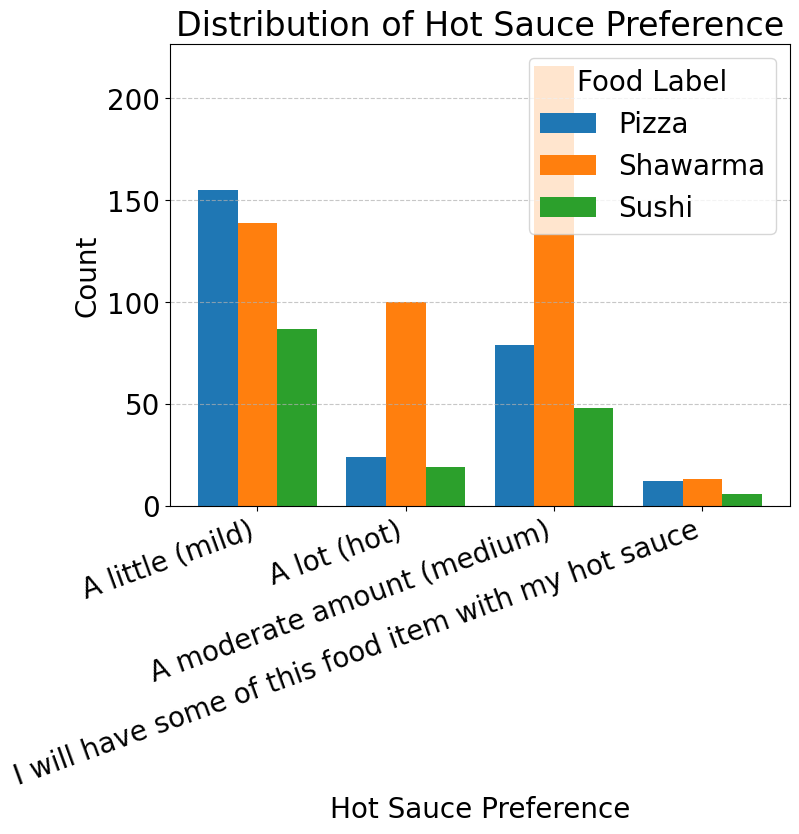

In [46]:



def plot_categorical_distribution_by_label(df, feature_key, feature_name):
    labels = df['Label'].unique()
    labels.sort()

    # Extract unique categories from the column (splitting multi-response answers)
    all_responses = df[feature_key].dropna().tolist()
    unique_values = sorted(set(item.strip() for response in all_responses for item in str(response).split(',')))

    bar_width = 0.8 / len(labels)  # width of each bar
    x = np.arange(len(unique_values))  # x positions for bars

    plt.figure(figsize=(8, 6))

    for i, label in enumerate(labels):
        subset = df[df['Label'] == label]
        split_responses = [item.strip() for response in subset[feature_key].dropna() for item in str(response).split(',')]
        response_counts = Counter(split_responses)
        sorted_values = [response_counts.get(value, 0) for value in unique_values]

        plt.bar(x + i * bar_width, sorted_values, width=bar_width, label=str(label))

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.xticks(x + bar_width * (len(labels)-1) / 2, unique_values, rotation=20, ha="right")
    plt.legend(title='Food Label')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('graphs/{}.png'.format(feature_name))

    plt.show()

plot_categorical_distribution_by_label(df, 'Q8: How much hot sauce would you add to this food item?', 'Hot Sauce Preference')


In [47]:

def get_all_option_answered(column):

    # Drop NaN values and split each response by comma, then flatten into a single list
    unique_values = set()
    df[column].dropna().apply(lambda x: unique_values.update([val.strip() for val in x.split(',')]))
    return unique_values
# Display all unique values
unique_q3_values = get_all_option_answered("Q3: In what setting would you expect this food to be served? Please check all that apply")
print(f"Unique settings for Q3:\n{unique_q3_values}")

unique_q7_values = get_all_option_answered("Q7: When you think about this food item, who does it remind you of?")
print(f"Unique settings for Q7:\n{unique_q7_values}")

Unique settings for Q3:
{'Week day dinner', 'Weekend lunch', 'Weekend dinner', 'At a party', 'Week day lunch', 'Late night snack'}
Unique settings for Q7:
{'Siblings', 'Parents', 'Friends', 'Teachers', 'Strangers'}


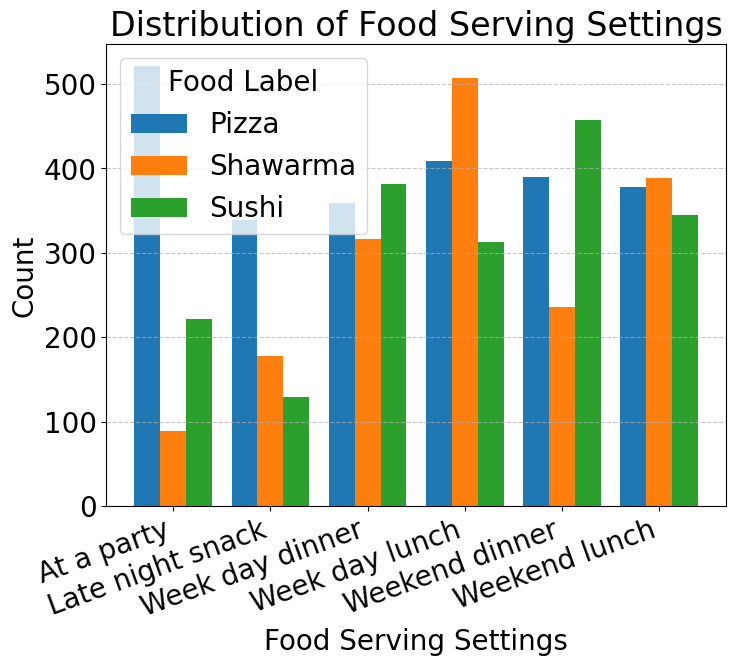

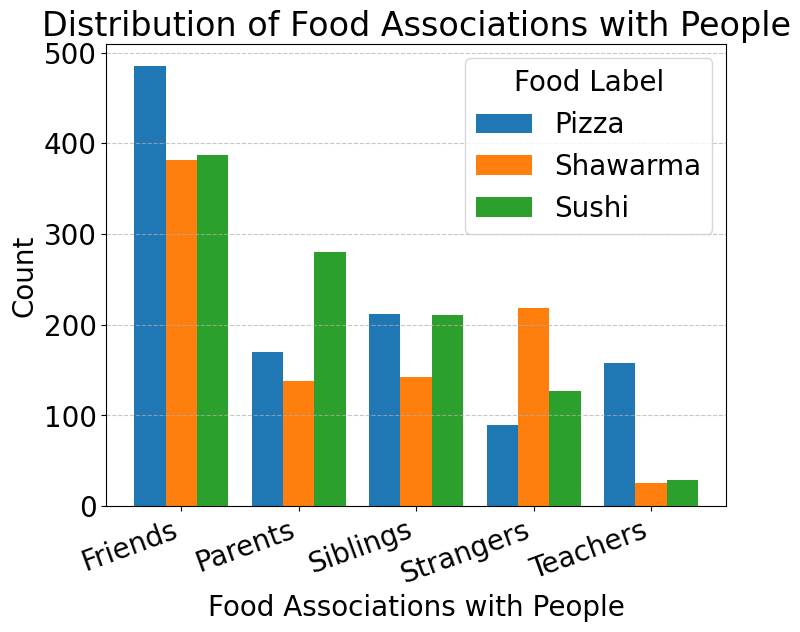

In [48]:


plot_categorical_distribution_by_label(df, "Q3: In what setting would you expect this food to be served? Please check all that apply", "Food Serving Settings")
plot_categorical_distribution_by_label(df, "Q7: When you think about this food item, who does it remind you of?", "Food Associations with People")




## Part 4.Text Features

In [49]:

def extract_vocab(df, column):
    vocab_set = set()
    for responses in df[column].dropna():
        words = responses.split(',')  # Split by comma
        vocab_set.update([w.strip() for w in words])
    return list(vocab_set)


vocab_q5 = extract_vocab(df, "Q5: What movie do you think of when thinking of this food item?")
vocab_q6 = extract_vocab(df, "Q6: What drink would you pair with this food item?")

# Print vocabulary sizes
print(f"Vocabulary Size for Q5: {len(vocab_q5)}")
print(f"Vocabulary Size for Q6: {len(vocab_q6)}")


Vocabulary Size for Q5: 808
Vocabulary Size for Q6: 434


In [50]:


# Function to extract vocabulary of movies
def extract_vocab(df, text_column):
    """
    Extract a vocabulary list from the specified text column using regex.
    """
    vocab_set = set()
    for response in df[text_column].dropna():
        words = re.findall(r'\b\w+\b', response.lower())
        vocab_set.update(words)
    return list(sorted(vocab_set))

# Extract vocabulary for Q5 (Movies)
vocab_q5 = extract_vocab(df, "Q5: What movie do you think of when thinking of this food item?")

print(f"Vocabulary Size for Q5 (Movies): {len(vocab_q5)}")
print("List of Movies:", vocab_q5)


Vocabulary Size for Q5 (Movies): 998
List of Movies: ['007', '1', '10', '1001', '11', '13', '1953', '2', '2001', '2002', '2004', '2005', '2006', '2008', '2012', '2014', '2016', '2018', '2021', '2022', '2024', '21', '3', '30', '3d', '4', '47', '6', '7', '85', '9', 'a', 'about', 'abyss', 'academia', 'across', 'action', 'actually', 'advengers', 'after', 'again', 'age', 'air', 'aladdin', 'alien', 'aliens', 'alita', 'all', 'alladin', 'alliteration', 'allowed', 'almost', 'alone', 'always', 'am', 'america', 'american', 'an', 'anchorman', 'and', 'angels', 'angry', 'animated', 'anime', 'animes', 'anjaana', 'anjaani', 'answer', 'any', 'anything', 'apology', 'appear', 'aquaman', 'arabia', 'arcane', 'are', 'argo', 'argument', 'around', 'as', 'asian', 'asians', 'asking', 'associate', 'associated', 'at', 'attending', 'avangers', 'avenegers', 'avenger', 'avengers', 'away', 'babylon', 'back', 'bad', 'bahen', 'baked', 'barbie', 'barely', 'based', 'batman', 'battle', 'bbc', 'be', 'beautiful', 'beautiful

## Conclusion
### Features
Complexity: numerical 1-5\
Number of ingredient: text that can turn in to numbers.\
Serve setting: multiple choice {'Week day dinner', 'Week day lunch', 'Weekend lunch', 'Weekend dinner', 'Late night snack', 'At a party'}\
Price: text that can turn in to numbers.\
Movie: text\
Paring Drinks: text\
People associate: multiple choice {'Friends', 'Teachers', 'Strangers', 'Parents', 'Siblings'}\
hot sauce: order categorical {'A little (mild)' nan 'A moderate amount (medium)'
 'I will have some of this food item with my hot sauce' 'A lot (hot)'}
### Labels
 {'Pizza', 'Shawarma', 'Sushi'}



# Model Tests

Bayes Search for optimum model for the data and returns best results.

In [51]:

from naive_bayes.Model import XGen
from sklearn.pipeline import Pipeline
from naive_bayes.feature_selection import *

def evaluate_feature_models(df, y, models_list, xgen: XGen,
                            cv=3, test_size=0.2, random_state=42, n_iter=5):
    """
    Evaluates a list of models using a pipeline that starts with XGen for feature extraction.
    """
    results = {}

    for model_info in models_list:
        model_name = model_info.get("name", "Unnamed Model")
        estimator = model_info["estimator"]
        search_space = model_info["search_space"]

        print(f"\nTuning model: {model_name}")

        # Create a pipeline: XGen → Classifier
        pipeline = Pipeline([
            ("xgen", xgen),
            ("model", estimator)
        ])

        # Adjust search space keys to match pipeline format
        adjusted_search_space = {
            # 'xgen__text_method': ['binary', 'tfidf'],
            **{f"model__{key}": value for key, value in search_space.items()}
        }

        # Run Bayesian optimization
        optimizer = BayesSearchCV(
            estimator=pipeline,
            search_spaces=adjusted_search_space,
            n_iter=n_iter,
            cv=cv,
            scoring='accuracy',
            random_state=random_state,
            n_jobs=1
        )

        optimizer.fit(df, y)  # XGen transforms df inside the pipeline

        best_params = optimizer.best_params_
        best_cv_score = optimizer.best_score_

        model_result = {
            "model_name": model_name,
            "best_params": best_params,
            "best_cv_score": best_cv_score,
        }
        results[model_name] = model_result

        print(f"{model_name} - Best CV Score: {best_cv_score:.4f}, "
              f"Best Params: {best_params}")

    return results


def evaluate_features(feature_list, feature_type, df, y, models):
    """
    Evaluates a list of features using a given feature extraction function,
    and aggregates the results with the feature name and feature type.
    """
    aggregated_results = []
    for feature in feature_list:
        if feature_type == "numerical":
            xgen = XGen(num_cols=[feature], cate_cols=[], text_cols=[])
        elif feature_type == "category":
            xgen = XGen(num_cols=[], cate_cols=[feature], text_cols=[])
        elif feature_type == "text":
            xgen = XGen(num_cols=[], cate_cols=[], text_cols=[feature])
        aggregated_results += evaluate_x(df, y, models ,feature, feature_type, xgen)
    return aggregated_results

def evaluate_x(df, y, models, feature, feature_type, xgen):
    aggregated_results = []
    model_results = evaluate_feature_models(df, y, models, xgen)
    for model_name, res in model_results.items():
        res_update = res.copy()
        res_update.update({"feature": feature, "feature_type": feature_type})
        aggregated_results.append(res_update)
    return aggregated_results


Choose models and features to test

In [52]:
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv(dir)
df_shuffled = df.sample(frac=1, random_state=42)  # Shuffle rows (set random_state for reproducibility)
df_train = df_shuffled.iloc[:int(len(df_shuffled) * 0.8)]  # Take first 80% of rows
df_test = df_shuffled.iloc[int(len(df_shuffled) * 0.8):]

# Specify the label column.
label_column = "Label"

# Define the list of models with their estimators and search spaces.
models_to_test = [
    {
        "name": "Naive Bayes",
        "estimator": MultinomialNB(),  # from sklearn.naive_bayes
        "search_space": {
            "alpha": (1e-3, 1e+2, "log-uniform")
        }
    },
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(max_iter=10000),  # from sklearn.linear_model
        "search_space": {
            "C": (1e-3, 1e5, "log-uniform")
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),  # from sklearn.ensemble
        "search_space": {
            "n_estimators": (50, 600, "uniform"),
            "max_depth": (2, 100, "uniform"),
            "min_samples_split": (2, 10, "uniform")
        }
    },
    {
        "name": "KNN",
        "estimator": KNeighborsClassifier(),  # from sklearn.neighbors
        "search_space": {
            "n_neighbors": (1, 30, "uniform"),
            "weights": ["uniform", "distance"],
            "p": (1, 2)  # 1 = Manhattan, 2 = Euclidean
        }
    }
]

features = [
    "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    "Q2: How many ingredients would you expect this food item to contain?",
    "Q3: In what setting would you expect this food to be served? Please check all that apply",
    "Q4: How much would you expect to pay for one serving of this food item?",
    "Q5: What movie do you think of when thinking of this food item?",
    "Q6: What drink would you pair with this food item?",
    "Q7: When you think about this food item, who does it remind you of?",
    "Q8: How much hot sauce would you add to this food item?"
]
candidate_num_cols = features
candidate_text_cols = features
candidate_category_cols = features


In [66]:
y = df_train[label_column]


In [54]:
# all_results = []
# all_results += evaluate_features(candidate_num_cols, "numerical", df_train, y, models_to_test)
# all_results += evaluate_features(candidate_category_cols, "category", df_train, y, models_to_test)
# all_results += evaluate_features(candidate_text_cols, "text", df_train, y, models_to_test)
#
# # Convert the results to a DataFrame and save to CSV.
# results_df = pd.DataFrame(all_results)
# results_csv_path = Path("naive_bayes/evaluation_results.csv")
# results_df.to_csv(results_csv_path, index=False)

Init HybridModel to integrate features

In [67]:
num_cols = [
    # "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    # "Q2: How many ingredients would you expect this food item to contain?",
    # "Q3: In what setting would you expect this food to be served? Please check all that apply",
    # "Q4: How much would you expect to pay for one serving of this food item?",
    # "Q5: What movie do you think of when thinking of this food item?",
    # "Q6: What drink would you pair with this food item?",
    # "Q7: When you think about this food item, who does it remind you of?",
    # "Q8: How much hot sauce would you add to this food item?"
]
cate_cols = [
    "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    # "Q2: How many ingredients would you expect this food item to contain?",
    "Q3: In what setting would you expect this food to be served? Please check all that apply",
    # "Q4: How much would you expect to pay for one serving of this food item?",
    # "Q5: What movie do you think of when thinking of this food item?",
    # "Q6: What drink would you pair with this food item?",
    "Q7: When you think about this food item, who does it remind you of?",
    "Q8: How much hot sauce would you add to this food item?"
]
text_cols = [
    # "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    "Q2: How many ingredients would you expect this food item to contain?",
    # "Q3: In what setting would you expect this food to be served? Please check all that apply",
    "Q4: How much would you expect to pay for one serving of this food item?",
    "Q5: What movie do you think of when thinking of this food item?",
    "Q6: What drink would you pair with this food item?",
    # "Q7: When you think about this food item, who does it remind you of?",
    # "Q8: How much hot sauce would you add to this food item?"
]

In [56]:
from naive_bayes.Model import XGen


def convert_prob_selection(prob_selection_rev, all_features):
    new_mapping = {}
    for f in all_features:
        for key in prob_selection_rev:
            if f in prob_selection_rev[key]:
                new_mapping[f] = key
        if f not in new_mapping:
            new_mapping[f] = "none"
    return new_mapping

prob_selection = convert_prob_selection({}, features)
# None where converted to probabilities, hence raw data

xgen = XGen(
    num_cols=num_cols,
    text_cols=text_cols,
    cate_cols=cate_cols,
    text_method="binary",
)

In [69]:

results_full = evaluate_x(df_train, y, models_to_test, feature="Combined Transformed Data", feature_type="mixed", xgen=xgen)



Tuning model: Naive Bayes
Naive Bayes - Best CV Score: 0.9019, Best Params: OrderedDict([('model__alpha', 0.1675569944093659)])

Tuning model: Logistic Regression
Logistic Regression - Best CV Score: 0.8913, Best Params: OrderedDict([('model__C', 1.9091131576909444)])

Tuning model: Random Forest
Random Forest - Best CV Score: 0.8935, Best Params: OrderedDict([('model__max_depth', 42), ('model__min_samples_split', 8), ('model__n_estimators', 563)])

Tuning model: KNN
KNN - Best CV Score: 0.8472, Best Params: OrderedDict([('model__n_neighbors', 25), ('model__p', 1), ('model__weights', 'distance')])


In [58]:
import math


def plot_evaluation_results(df, output_image_path):

    """
    Reads the evaluation CSV and creates one subplot per feature.
    In each subplot, the x-axis is the model name and the y-axis is the test accuracy.
    If the same feature has multiple representations (feature_type), their test scores are shown as grouped bars.
    The resulting figure is saved to output_image_path.
    """

    cols = {
        "id": "id",
        "complexity": "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
        "ingredients": "Q2: How many ingredients would you expect this food item to contain?",
        "setting": "Q3: In what setting would you expect this food to be served? Please check all that apply",
        "price": "Q4: How much would you expect to pay for one serving of this food item?",
        "movie": "Q5: What movie do you think of when thinking of this food item?",
        "drink": "Q6: What drink would you pair with this food item?",
        "reminder": "Q7: When you think about this food item, who does it remind you of?",
        "hotsauce": "Q8: How much hot sauce would you add to this food item?",
        "label": "Label",
    }
    rev_col= {v: k for k, v in cols.items()}

    color_map = {
        "category": "blue",
        "text": "orange",
        "numerical": "green",
    }
    model_name_map = {
        "Naive Bayes" : "NB",
        "Logistic Regression" : "LR",
        "Random Forest" : "RF",
        "KNN" : "KNN",
    }

    # Get unique features (each subplot will represent one feature).
    unique_features = df["feature"].unique()
    num_features = len(unique_features)

    # Set up a grid for subplots.
    ncols = 3
    if num_features < ncols:
        ncols = num_features
    nrows = math.ceil(num_features / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows), squeeze=False)

    for idx, feature in enumerate(unique_features):
        ax = axes[idx // ncols][idx % ncols]
        subset = df[df["feature"] == feature]

        # Unique models evaluated on this feature.
        models = subset["model_name"].unique()
        # Unique representations (feature_type) for this feature.
        feature_types = subset["feature_type"].unique()

        # Define bar width so that bars for multiple representations fit under one model.
        bar_width = 0.8 / len(feature_types)
        indices = np.arange(len(models))

        # For each representation type, plot its corresponding test score for each model.
        for j, ft in enumerate(feature_types):
            scores = []
            for model in models:
                # Get row(s) for the given model and representation.
                row = subset[(subset["model_name"] == model) & (subset["feature_type"] == ft)]
                if not row.empty:
                    # If multiple entries exist, take the average test score.
                    scores.append(row["best_cv_score"].mean())
                else:
                    scores.append(np.nan)
            if ft in color_map:
                color = color_map[ft]
            else:
                color = "grey"
            ax.bar(indices + j * bar_width, scores, bar_width, label=ft, color=color)

        title = feature
        if feature in rev_col:
            title = rev_col[feature]
        ax.set_title(title)
        ax.set_xticks(indices + bar_width * (len(feature_types) - 1) / 2)
        model_names = [model_name_map[m] for m in models]
        ax.set_xticklabels(model_names, rotation=0, ha='right')
        ax.set_ylabel("CV Accuracy")
        ax.set_ylim(0, 1)
        ax.grid(True)
        # ax.legend(title="Representation")


    # Remove empty subplots if any.
    fig.suptitle("Model Performance on Features", fontsize=22)

    total_plots = nrows * ncols
    if num_features < total_plots:
        for idx in range(num_features, total_plots):
            fig.delaxes(axes[idx // ncols][idx % ncols])
    plt.tight_layout()
    if output_image_path is not None:
        plt.savefig(output_image_path)
    plt.show()



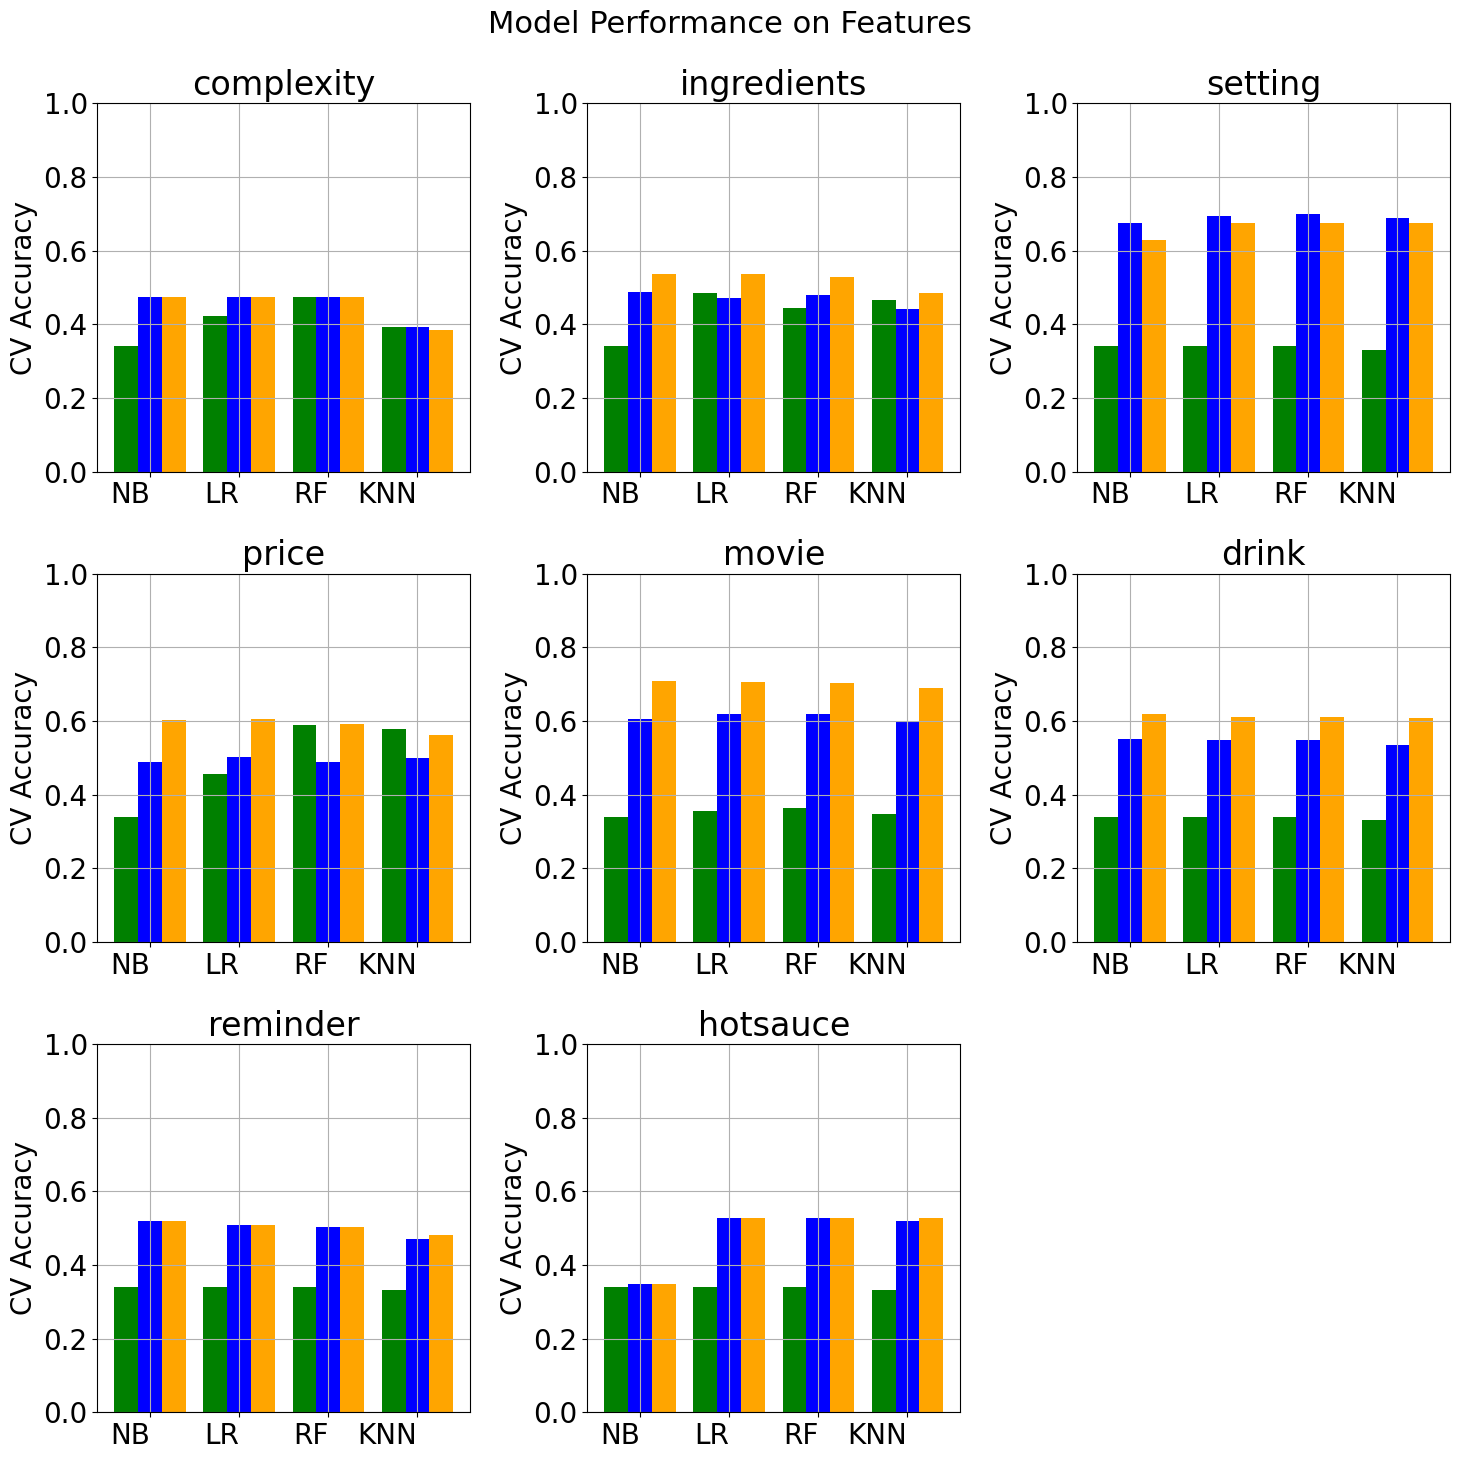

In [59]:
csv_file_path = "naive_bayes/evaluation_results.csv"
output_image_path = "graphs/evaluation_plots.png"
df_tests_results = pd.read_csv(csv_file_path)
plot_evaluation_results(df_tests_results, output_image_path)

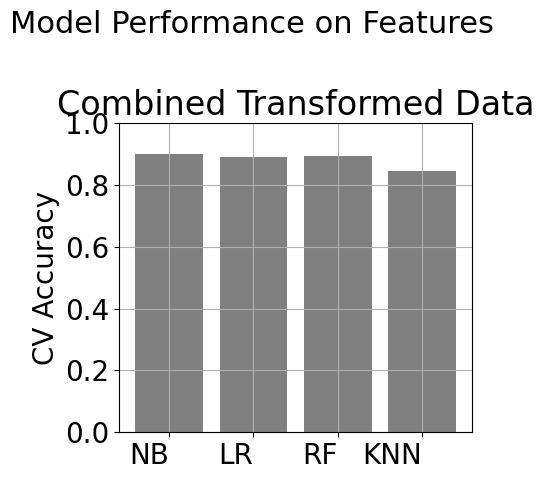

In [60]:
plot_evaluation_results(pd.DataFrame(results_full), "graphs/evaluation_combined.png")

Note logistic regression and random forest give close results, but takes less time to train.

Now train and store our model

In [61]:
from naive_bayes.Model import *
from Model_training import train

xgen_filename = "xgen_params.pkl"
classifier_filename = "classifier_params.pkl"
xgen = XGen(num_cols, cate_cols, text_cols, text_method="binary")
classifier_params, best_model, hyperparams, best_score = train(df_train, xgen)

X_train.shape: (1315, 9)
Best params: OrderedDict([('classifier__C', 0.1588922634833232), ('svd__percentage', 1.0), ('transform__text_method', 'binary')])
Best CV accuracy: 0.8942889436695408


In [62]:
print(classifier_params)

{'svd_components': array([[ 0.17651791,  0.04280829,  0.11750461, ...,  0.00111685,
         0.00113291,  0.00690326],
       [ 0.24179867, -0.08645333, -0.29286503, ..., -0.00066025,
        -0.00051869,  0.00911573],
       [ 0.088443  ,  0.00522546, -0.1041979 , ..., -0.0019802 ,
        -0.00383048,  0.00346581],
       ...,
       [-0.00353647, -0.00046728, -0.00134809, ..., -0.09064309,
         0.0024299 , -0.01240026],
       [-0.00324355, -0.00205735, -0.00479977, ..., -0.05492644,
         0.00817869,  0.01669255],
       [-0.01141152, -0.01212094, -0.01415582, ...,  0.12918398,
        -0.01628624, -0.00121983]]), 'W': array([[ 0.53749744,  2.23660905,  0.7257953 , ...,  0.00324589,
        -0.02836506, -0.03196995],
       [-0.1286198 , -0.743679  , -1.27770239, ...,  0.01644313,
        -0.04129721,  0.04450194],
       [-0.40887764, -1.49293005,  0.5519071 , ..., -0.01968903,
         0.06966227, -0.01253199]]), 'b': array([-1.05369986,  0.25440658,  0.79929328]), 'classe

In [63]:
import pickle

t_train = df_train[label_column]
t_test = df_test[label_column]
print("train score", best_model.score(df_train, t_train))

print("best model test score", best_model.score(df_test, t_test))

# save the resulting params
xgen = best_model.named_steps['transform']
xgen.save(xgen_filename)
with open(classifier_filename, "wb") as f:
    pickle.dump(classifier_params, f)

# test if our own model works the same as the sklearn pipline
y = predict_df(df_test, xgen_filename, classifier_filename)
print("ModelClassifier test score", np.mean(y == t_test))

train score 0.9429657794676806
best model test score 0.8844984802431611
ModelClassifier test score 0.8844984802431611


In [64]:
# Train the full model without changing hyperparams or evaluation
model_params, best_pipeline, _ ,_ = train(df, xgen, tune_hyperparams=False, best_params=hyperparams)
xgen.save("col_params.pkl")
with open("model_params.pkl", "wb") as f:
    pickle.dump(model_params, f)

X_train.shape: (1644, 9)
